<a href="https://colab.research.google.com/github/MajiroZ/for_git_study/blob/master/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##【問題1】各種手法の実行

### SimpleRNN

In [2]:
from __future__ import print_function
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding,SimpleRNN,LSTM, GRU # Import GRU directly from keras.layers
from keras.datasets import imdb
from keras import backend as K

In [3]:
max_features = 20000
maxlen = 80
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
batch_size = 32
epochs = 1
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test, y_test))

782/782 ━━━━━━━━━━━━━━━━━━━━ 58s 71ms/step - accuracy: 0.5127 - loss: 0.7042 - val_accuracy: 0.5968 - val_loss: 0.6607


In [6]:
score, acc = model.evaluate(x_test, y_test,batch_size=batch_size)

782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5955 - loss: 0.6612


### LSTM

In [7]:
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
batch_size = 32
epochs = 1
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test, y_test))

782/782 ━━━━━━━━━━━━━━━━━━━━ 161s 203ms/step - accuracy: 0.7099 - loss: 0.5415 - val_accuracy: 0.8282 - val_loss: 0.3949


### GRU

In [10]:
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
batch_size = 32
epochs = 1
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test, y_test))

782/782 ━━━━━━━━━━━━━━━━━━━━ 137s 171ms/step - accuracy: 0.6852 - loss: 2.8448 - val_accuracy: 0.7135 - val_loss: 0.5509


### ConvLSTM2D

In [13]:
!pip install tensorflow
!pip install keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, ConvLSTM2D, BatchNormalization, Embedding, GRU, Dense

import numpy as np
import pylab as plt
from keras import backend as K

In [20]:
batch_size = 32
epochs = 1
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test, y_test))

782/782 ━━━━━━━━━━━━━━━━━━━━ 136s 170ms/step - accuracy: 0.8137 - loss: 405.7930 - val_accuracy: 0.7270 - val_loss: 0.5362


ConvLSTM2Dは他の手法と比較して有意に精度が高いといえる。

In [15]:
def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),dtype=float)
    for i in range(n_samples):
        n = np.random.randint(3, 8)
        for j in range(n):
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1
            w = np.random.randint(2, 4)
            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,y_shift - w: y_shift + w, 0] += 1
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,x_shift - w - 1: x_shift + w + 1,y_shift - w - 1: y_shift + w + 1,0] += noise_f * 0.1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,y_shift - w: y_shift + w, 0] += 1
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

noisy_movies, shifted_movies = generate_movies(n_samples=1200)

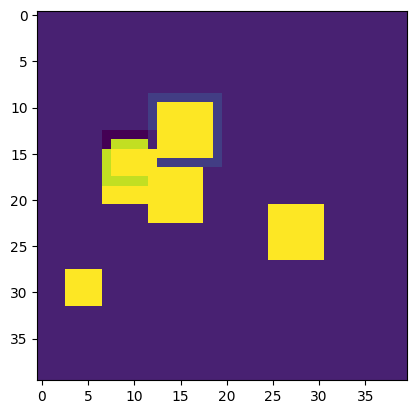

In [16]:
index = 1
x = noisy_movies[index]
fig = plt.figure()
viewer = fig.add_subplot(111)
plt.ion()
fig.show()
for i in range(len(x)):
    viewer.clear()
    viewer.imshow(x[i])
    plt.pause(.1)
    fig.canvas.draw()

In [17]:
seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),input_shape=(None, 40, 40, 1),padding='same', return_sequences=True))
seq.add(BatchNormalization())
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),padding='same', return_sequences=True))
seq.add(BatchNormalization())
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),padding='same', return_sequences=True))
seq.add(BatchNormalization())
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),padding='same', return_sequences=True))
seq.add(BatchNormalization())
seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),activation='sigmoid',padding='same', data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adadelta')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
seq.fit(noisy_movies[:100], shifted_movies[:100], batch_size=10,epochs=1, validation_split=0.05)

10/10 ━━━━━━━━━━━━━━━━━━━━ 223s 21s/step - loss: 0.9160 - val_loss: 0.7004


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 732ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 947ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 875ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 673ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 686ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 722ms/step


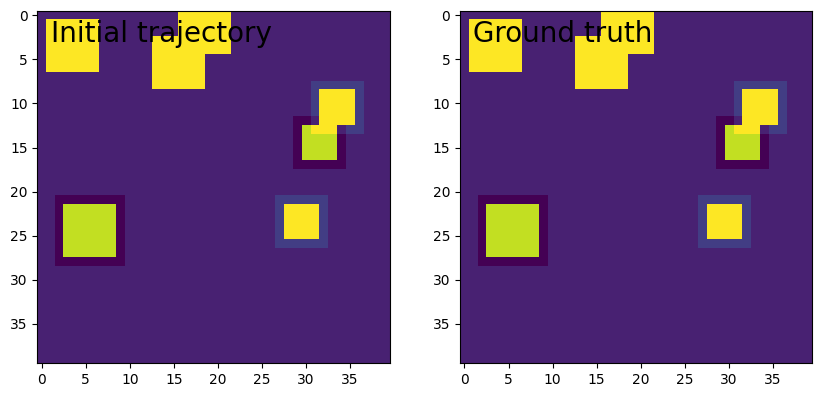

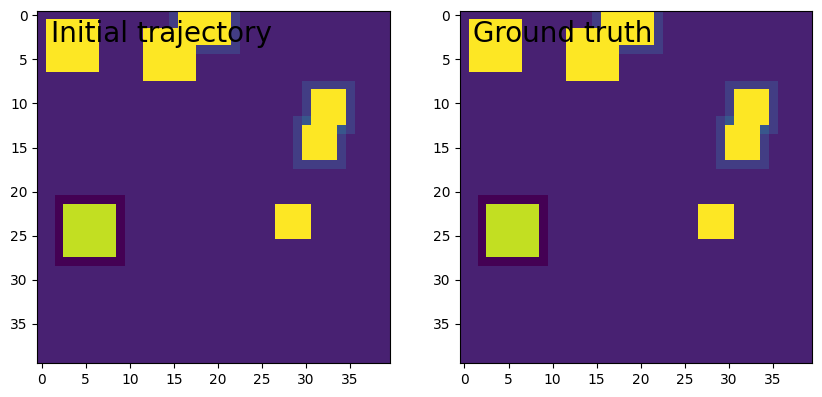

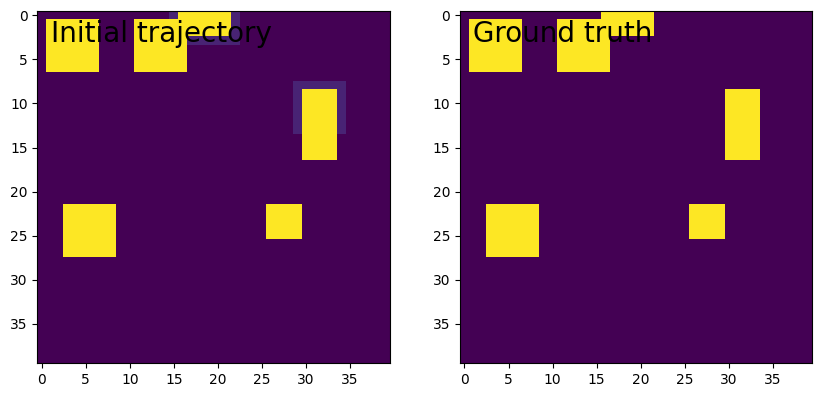

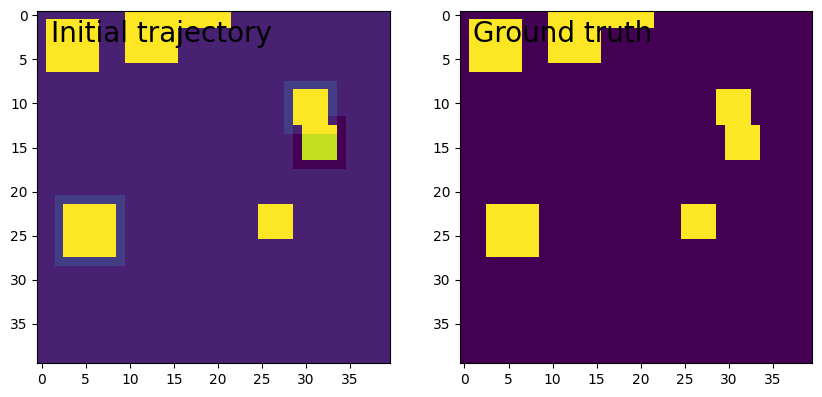

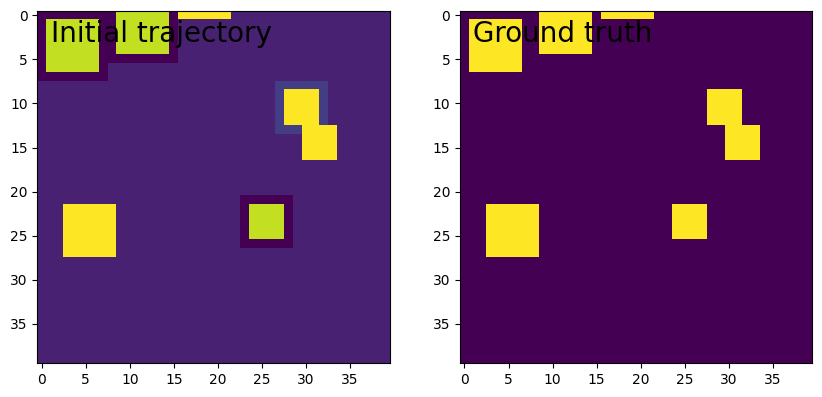

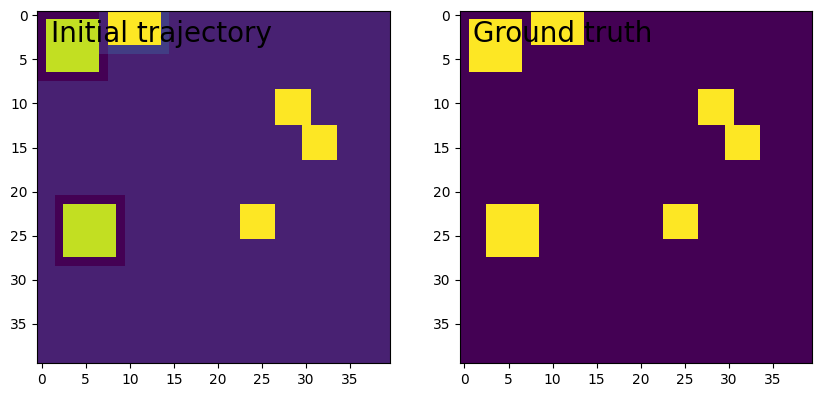

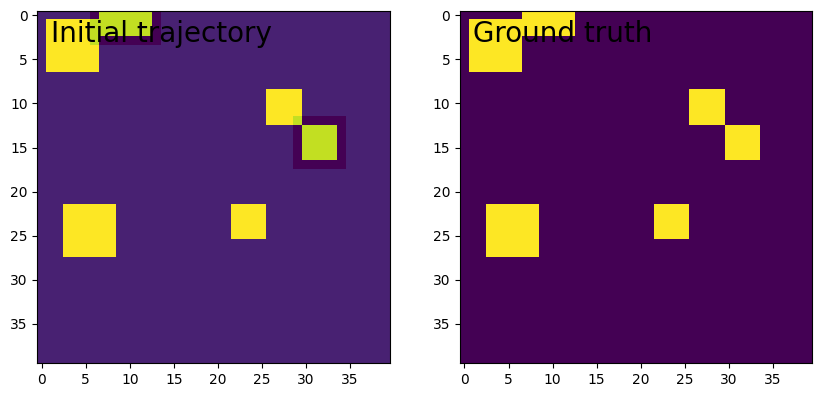

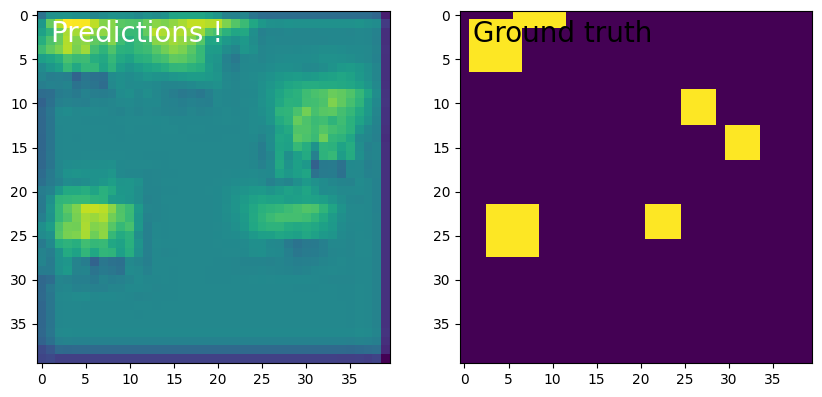

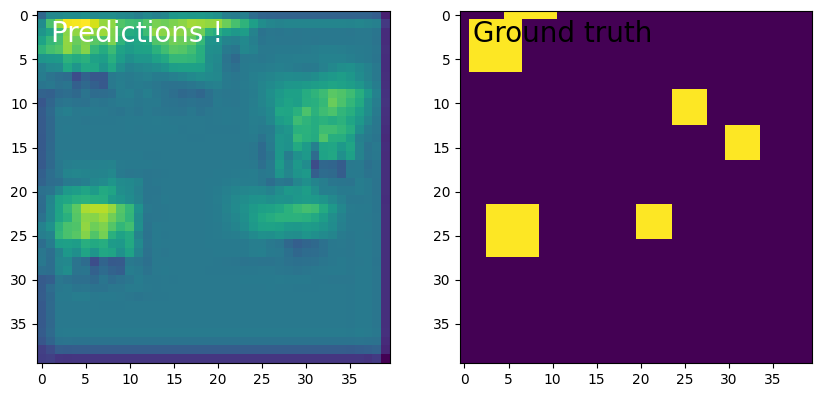

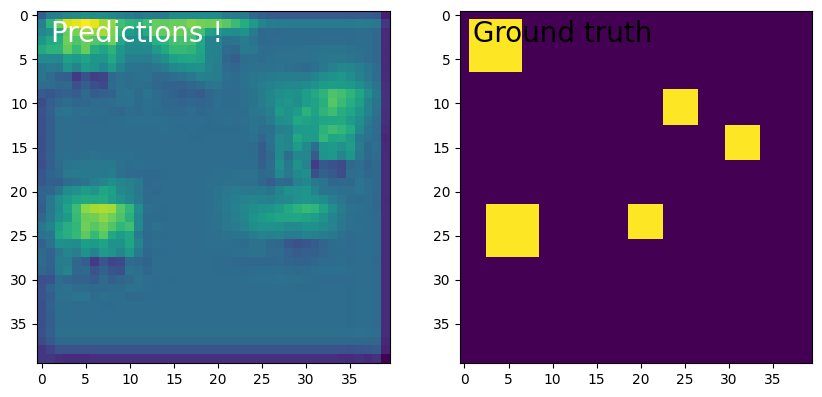

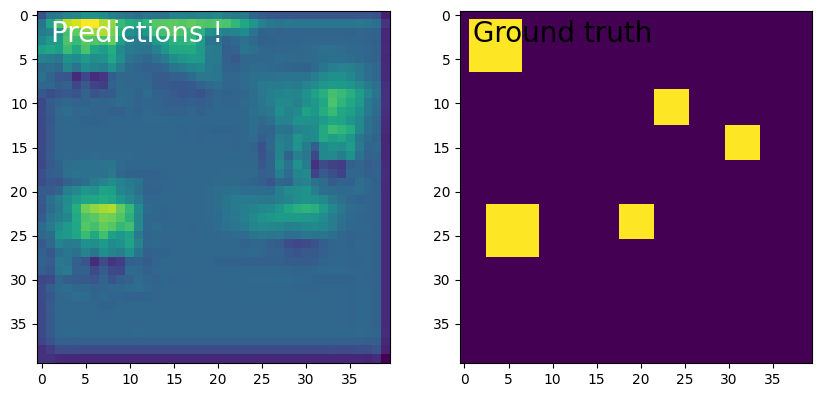

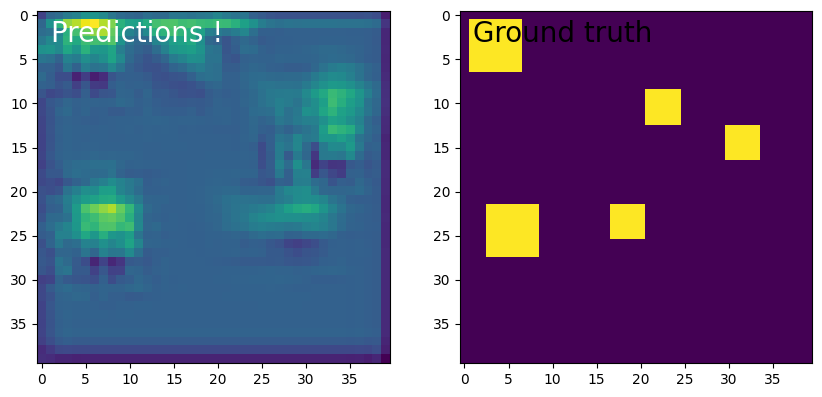

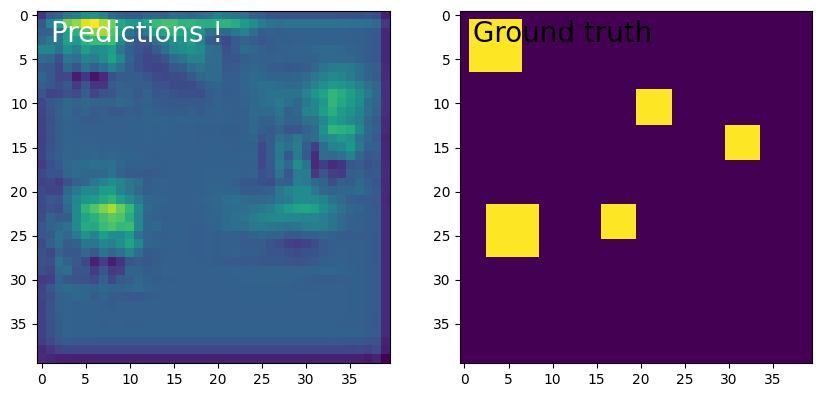

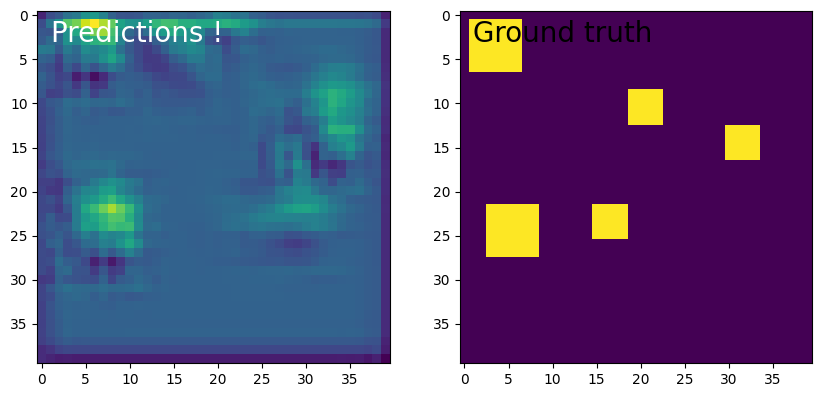

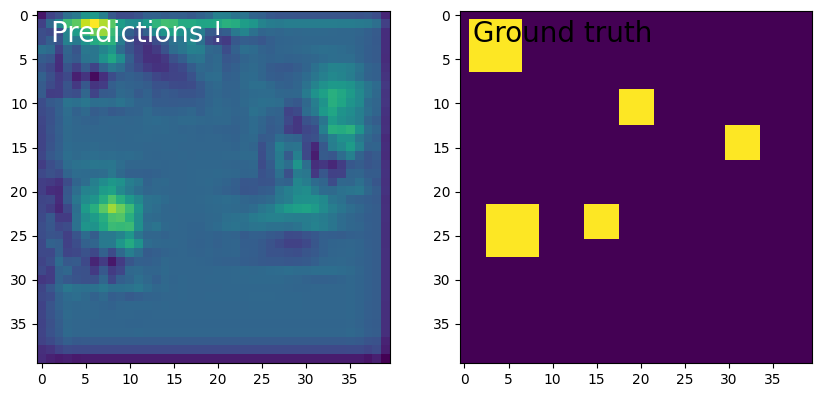

In [19]:
index = 1004
track = noisy_movies[index][:7, ::, ::, ::]
track2 = noisy_movies[index][::, ::, ::, ::]
for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)
for i in range(15):
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(121)
    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)
    toplot = track[i, ::, ::, 0]
    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)
    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[index][i - 1, ::, ::, 0]
    plt.imshow(toplot)
    plt.savefig('%i_animate.png' % (i + 1))

##【問題3】他のクラスの説明

RNN：リカレントニューラルネットワーク（RNN）とは、ノード間の接続が時間的な順序に沿った有向グラフを形成する人工ニューラルネットワークのクラスです。

SimpleRNNCell：SimpleRNNのCellクラスです。セルは、再帰的に現れる同じネットワーク構造です。

GRUCell: LSTMを簡略化したゲートを持つ再帰的なユニットであるgru layerのセルクラスです。

LSTMCell: 基本的にはLSTM層用のCellクラスで、1ステップ分の計算ロジックを含んでいます

StackedRNNCells: RNNセルスタックの動作を単一セルのように見せるためのラッパーです。ラッパーという単語は「中身は同じだが、外見は変えたい」ような時に使用します。

CuDNNGRU：CuDNNを使った高速GRUの実装です。

CuDNNLSTM：CuDNNを用いた高速なLSTM実装です。